# Description
Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.

Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.


## Problem Statement

Identify which questions asked on Quora are duplicates of questions that have already been asked.
This could be useful to instantly provide answers to questions that have already been answered.
We are tasked with predicting whether a pair of questions are duplicates or not.



### Sources

Source : https://www.kaggle.com/c/quora-question-pairs

## Data Overview
- Data will be in a file Train.csv
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate
- Number of rows in Train.csv = 404,290

It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head(25)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [4]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [5]:
#checking missing values

df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.dropna(axis=0 , inplace = True)

In [7]:
new_df = df.sample(30000,random_state=2)

In [8]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
#checking duplicate rows

new_df.duplicated().sum()

0

is_duplicate
0    18834
1    11166
Name: count, dtype: int64


<Axes: xlabel='is_duplicate'>

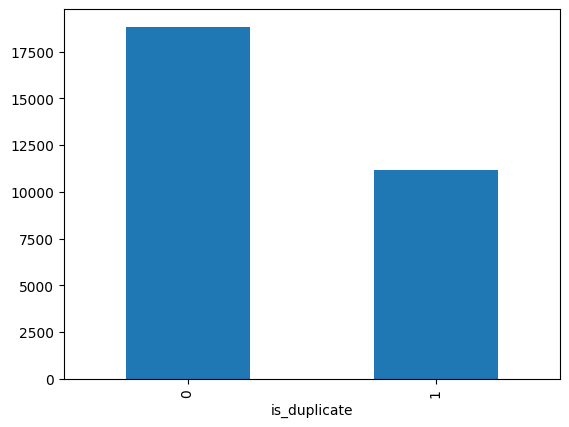

In [10]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
new_df['is_duplicate'].value_counts().plot(kind='bar')

0 ----> Not duplicated
1 ----> Duplicated

In [11]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55311
Number of questions getting repeated 3485


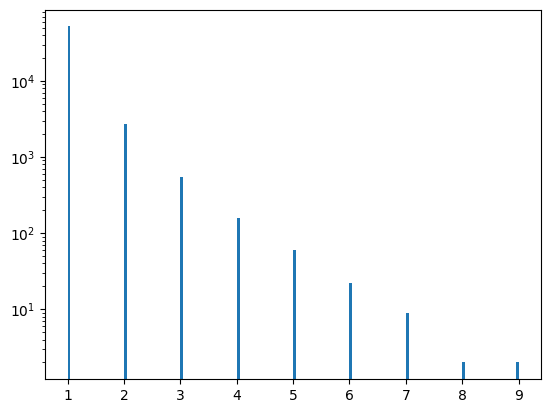

In [12]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins = 160)
plt.yscale('log')
plt.show()

## Text Preprocessing

Preprocessing:---

Removing html tags

Removing Punctuations

Performing stemming

Removing Stopwords

Expanding contractions etc.

In [13]:
from bs4 import BeautifulSoup

def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q


In [14]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [15]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

## Basic Feature Engineering

Let us now construct a few features like:

____freq_qid1____ = Frequency of qid1's

____freq_qid2____ = Frequency of qid2's

____q1len____ = Length of q1

____q2len____ = Length of q2

____q1_n_words____ = Number of words in Question 1

____q2_n_words____ = Number of words in Question 2

____word_Common____ = (Number of common unique words in Question 1 and Question 2)

____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)

____word_share____ = (word_common)/(word_Total)

____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2

____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2

In [16]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [17]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,33,43
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,20,37
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,44,72
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,58,63


In [18]:
new_df['q1_n_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_n_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_n_words,q2_n_words
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,33,43,5,7
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,20,37,3,6
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,44,72,11,17
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,58,63,11,12


In [19]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)  #intersection between two sets common words

new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_n_words,q2_n_words,word_common
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8,2
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,33,43,5,7,4
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,20,37,3,6,2
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,44,72,11,17,6
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,58,63,11,12,8


In [20]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8,2,13
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,33,43,5,7,4,12
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,20,37,3,6,2,9
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,44,72,11,17,6,27
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,58,63,11,12,8,23


In [21]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8,2,13,0.15
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,33,43,5,7,4,12,0.33
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,20,37,3,6,2,9,0.22
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,44,72,11,17,6,27,0.22
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,58,63,11,12,8,23,0.35


### Exploratory Data Analysis of Features

In [22]:
print ("Minimum length of the questions in question1 : " , min(new_df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(new_df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", new_df[new_df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", new_df[new_df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  2
Number of Questions with minimum length [question1] : 4
Number of Questions with minimum length [question2] : 0


minimum characters 1
maximum characters 315
average num of characters 58


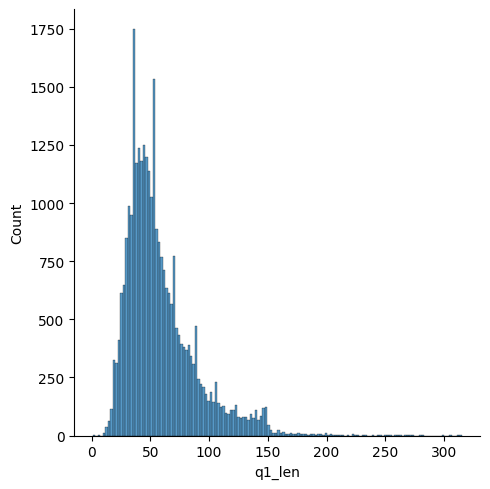

In [23]:
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 9
maximum characters 1170
average num of characters 59


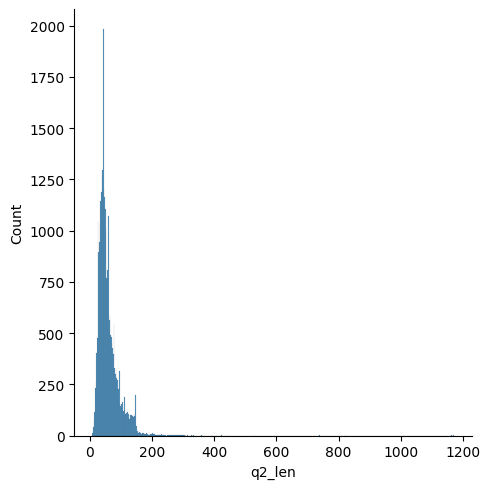

In [24]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

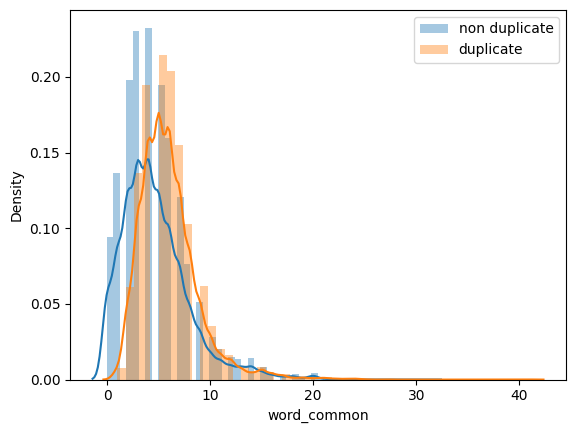

In [25]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

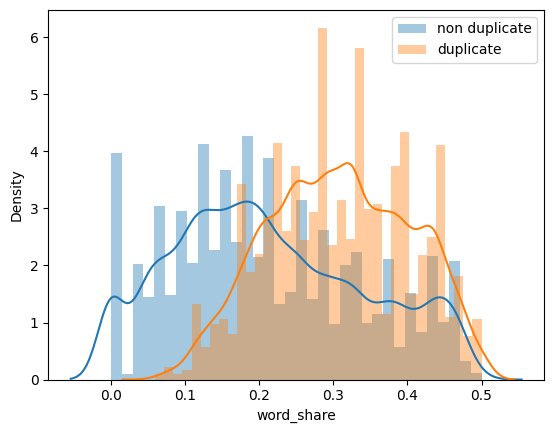

In [26]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

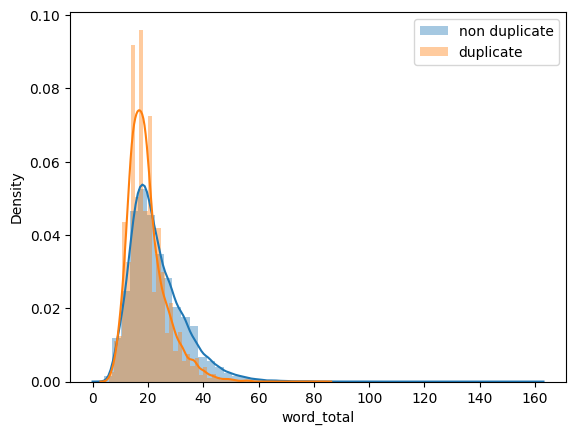

In [27]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

In [28]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8,2,13,0.15
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,33,43,5,7,4,12,0.33
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,20,37,3,6,2,9,0.22
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,44,72,11,17,6,27,0.22
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,58,63,11,12,8,23,0.35


### Dependent And Independent Features

In [29]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
331535,how can i learn norwegian,what is the quickest way to learn norwegian
45407,how are currency rates determined,where and how are exchange rates determined
286200,what is substitution,what is a substitute for caciocavallo
157195,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...
154346,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...


In [30]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share
331535,1,25,43,5,8,2,13,0.15
45407,1,33,43,5,7,4,12,0.33
286200,0,20,37,3,6,2,9,0.22
157195,1,44,72,11,17,6,27,0.22
154346,1,58,63,11,12,8,23,0.35


In [31]:
##converting text into numeircal
from sklearn.feature_extraction.text import CountVectorizer

# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features = 3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [32]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape


(30000, 6000)

In [33]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
331535,1,25,43,5,8,2,13,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
45407,1,33,43,5,7,4,12,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
286200,0,20,37,3,6,2,9,0.22,0,0,...,0,0,0,0,0,0,0,0,0,0
157195,1,44,72,11,17,6,27,0.22,0,0,...,0,0,0,0,0,0,0,0,0,0
154346,1,58,63,11,12,8,23,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#independent and dependent variables
X=final_df.iloc[:,1:].values
y=final_df.iloc[:,0].values

In [35]:
X

array([[25., 43.,  5., ...,  0.,  0.,  0.],
       [33., 43.,  5., ...,  0.,  0.,  0.],
       [20., 37.,  3., ...,  0.,  0.,  0.],
       ...,
       [37., 97., 16., ...,  0.,  0.,  0.],
       [34., 31.,  7., ...,  0.,  0.,  0.],
       [21., 34.,  3., ...,  0.,  0.,  0.]])

In [36]:
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

### Train test Split

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Model Training



#### Random Forest

Test Accuracy : 0.7611666666666667


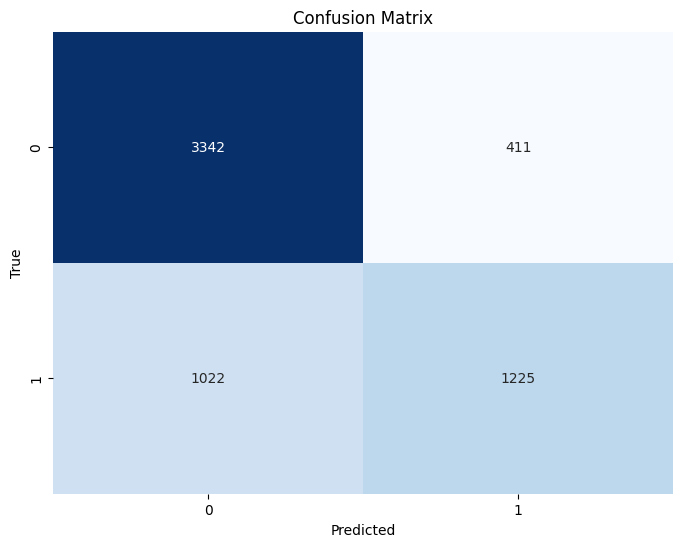

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.82      3753
           1       0.75      0.55      0.63      2247

    accuracy                           0.76      6000
   macro avg       0.76      0.72      0.73      6000
weighted avg       0.76      0.76      0.75      6000



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

acc =metrics.accuracy_score(y_test,y_pred)
print('Test Accuracy :', acc)


cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n",classification_report(y_test, y_pred))

#### XGBoost

Test Accuracy : 0.7548333333333334


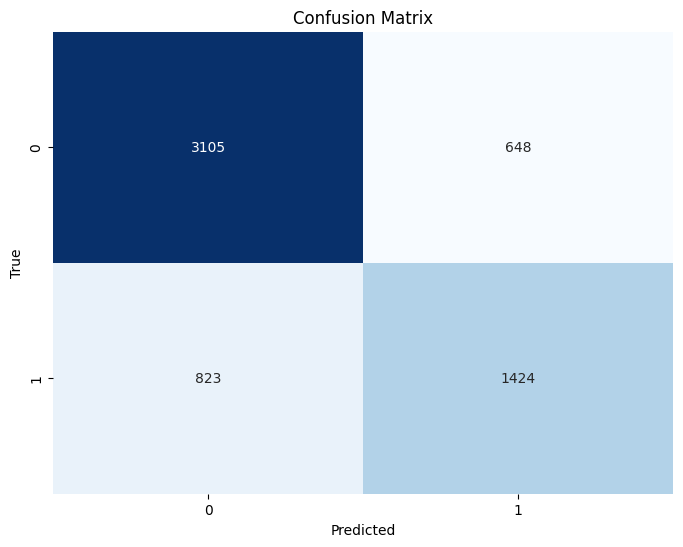

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      3753
           1       0.69      0.63      0.66      2247

    accuracy                           0.75      6000
   macro avg       0.74      0.73      0.73      6000
weighted avg       0.75      0.75      0.75      6000



In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

acc =metrics.accuracy_score(y_test,y_pred)
print('Test Accuracy :', acc)


cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n",classification_report(y_test, y_pred))

#### Logistic Regression

Test Accuracy : 0.7361666666666666


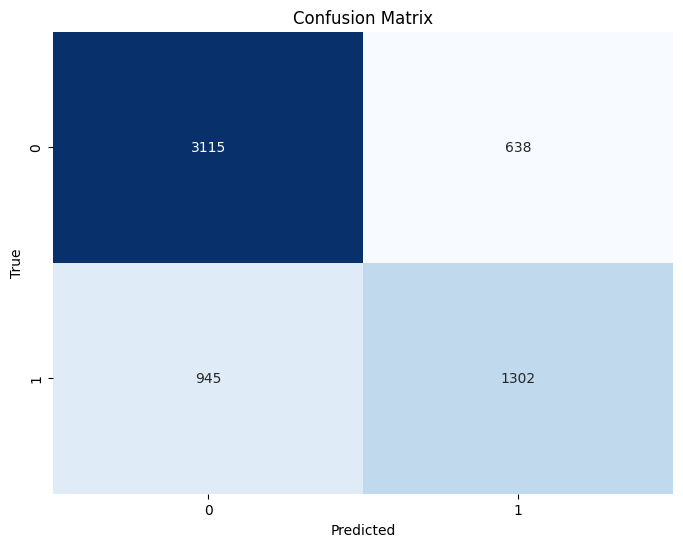

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      3753
           1       0.67      0.58      0.62      2247

    accuracy                           0.74      6000
   macro avg       0.72      0.70      0.71      6000
weighted avg       0.73      0.74      0.73      6000



In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

Lg = LogisticRegression()
Lg.fit(X_train,y_train)
y_pred = Lg.predict(X_test)

acc =metrics.accuracy_score(y_test,y_pred)
print('Test Accuracy :', acc)


cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n",classification_report(y_test, y_pred))

#### Decision Tree

Test Accuracy : 0.7078333333333333


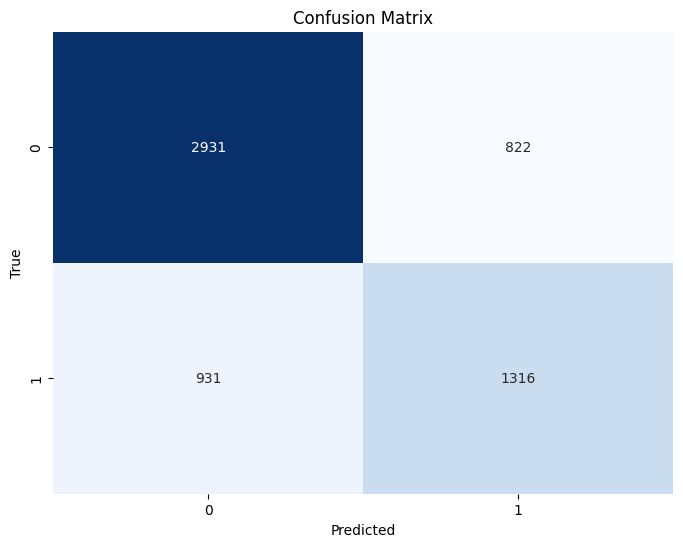

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      3753
           1       0.62      0.59      0.60      2247

    accuracy                           0.71      6000
   macro avg       0.69      0.68      0.69      6000
weighted avg       0.71      0.71      0.71      6000



In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

acc =metrics.accuracy_score(y_test,y_pred)
print('Test Accuracy :', acc)


cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n",classification_report(y_test, y_pred))

So the conclusion is,
From the above results Random Forest performs better than all of the above
To increase the Accuracy lets add more features to the dataset

# Advanced Feature Engineering

___Token Features___

cwc_min: This is the ratio of the number of common words to the length of the smaller question

cwc_max: This is the ratio of the number of common words to the length of the larger question

csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions

csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions

ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions

ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions

last_word_eq: 1 if the last word in the two questions is same, 0 otherwise

first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

In [42]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [43]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [44]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_n_words,q2_n_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
331535,331535,169053,295926,how can i learn norwegian,what is the quickest way to learn norwegian,1,25,43,5,8,...,13,0.15,0.999950,0.499988,0.000000,0.000000,0.399992,0.249997,1,0
45407,45407,81383,81384,how are currency rates determined,where and how are exchange rates determined,1,33,43,5,7,...,12,0.33,0.666644,0.666644,0.999950,0.499988,0.799984,0.571420,1,0
286200,286200,285024,406729,what is substitution,what is a substitute for caciocavallo,0,20,37,3,6,...,9,0.22,0.000000,0.000000,0.999950,0.499988,0.666644,0.333328,0,1
157195,157195,245856,245857,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...,1,44,72,11,17,...,27,0.22,0.666656,0.571420,0.499988,0.222220,0.545450,0.374998,0,0
154346,154346,242075,242076,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...,1,58,63,11,12,...,23,0.35,0.999975,0.799984,0.666656,0.499994,0.727266,0.666661,1,0


### EDA Of Advanced Features

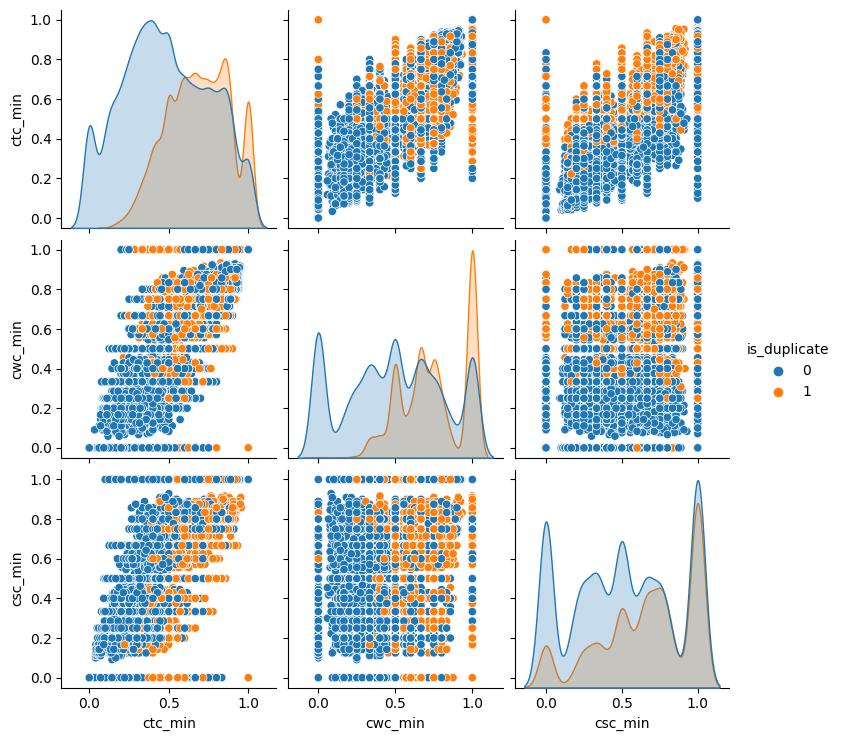

In [45]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

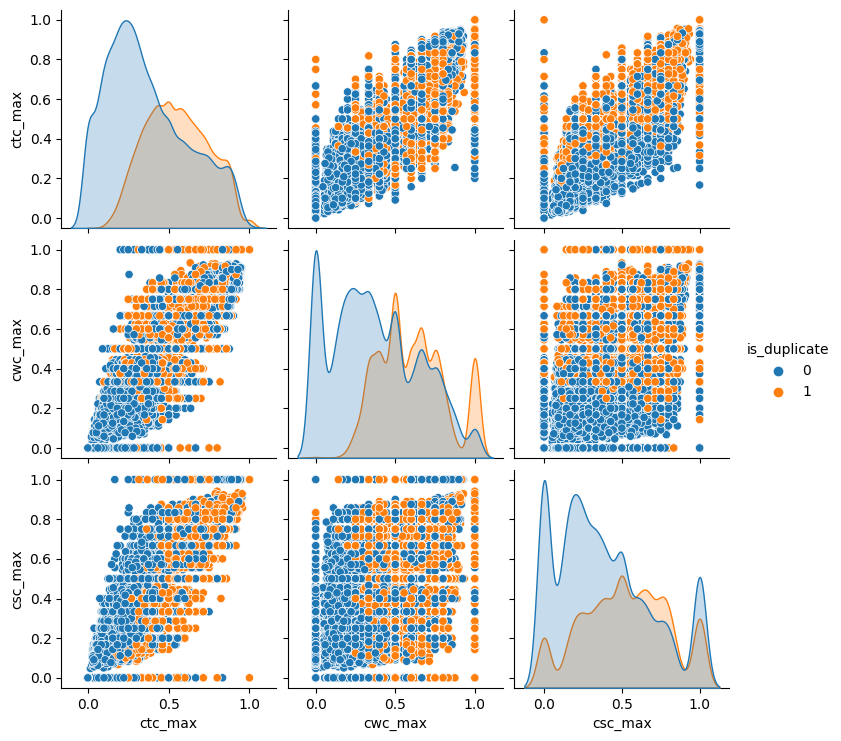

In [46]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

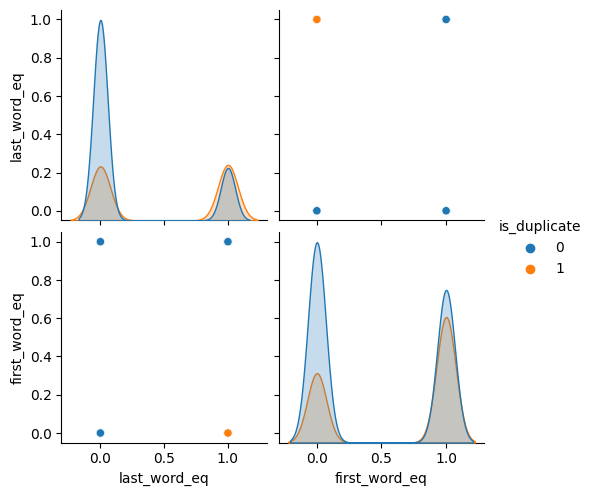

In [47]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

### Dependent And Independent Features

In [48]:
ques_df1 = new_df[['question1','question2']]
ques_df1.head()

,question1,question2
331535,how can i learn norwegian,what is the quickest way to learn norwegian
45407,how are currency rates determined,where and how are exchange rates determined
286200,what is substitution,what is a substitute for caciocavallo
157195,how can i make iphone 4s faster with ios 9 2,i have an iphone 4s how do i make it faster a...
154346,how can i help my girlfriend cope with her par...,what can i do to help my girlfriend through he...


In [49]:
final_df1 = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df1.shape)
final_df1.head()

(30000, 16)


,is_duplicate,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
331535,1,25,43,5,8,2,13,0.15,0.999950,0.499988,0.000000,0.000000,0.399992,0.249997,1,0
45407,1,33,43,5,7,4,12,0.33,0.666644,0.666644,0.999950,0.499988,0.799984,0.571420,1,0
286200,0,20,37,3,6,2,9,0.22,0.000000,0.000000,0.999950,0.499988,0.666644,0.333328,0,1
157195,1,44,72,11,17,6,27,0.22,0.666656,0.571420,0.499988,0.222220,0.545450,0.374998,0,0
154346,1,58,63,11,12,8,23,0.35,0.999975,0.799984,0.666656,0.499994,0.727266,0.666661,1,0


In [50]:
#converting text into numeircal
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df1['question1']) + list(ques_df1['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [51]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [52]:
final_df = pd.concat([final_df1, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6016)


,is_duplicate,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
331535,1,25,43,5,8,2,13,0.15,0.999950,0.499988,...,0,0,0,0,0,0,0,0,0,0
45407,1,33,43,5,7,4,12,0.33,0.666644,0.666644,...,0,0,0,0,0,0,0,0,0,0
286200,0,20,37,3,6,2,9,0.22,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
157195,1,44,72,11,17,6,27,0.22,0.666656,0.571420,...,0,0,0,0,0,0,0,0,0,0
154346,1,58,63,11,12,8,23,0.35,0.999975,0.799984,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#independent and dependent variables
X1=final_df.iloc[:,1:].values
y1=final_df.iloc[:,0].values

In [54]:
X1.shape

(30000, 6015)

#### Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=1)

## Model Training

#### Random Forest

Test Accuracy : 0.788


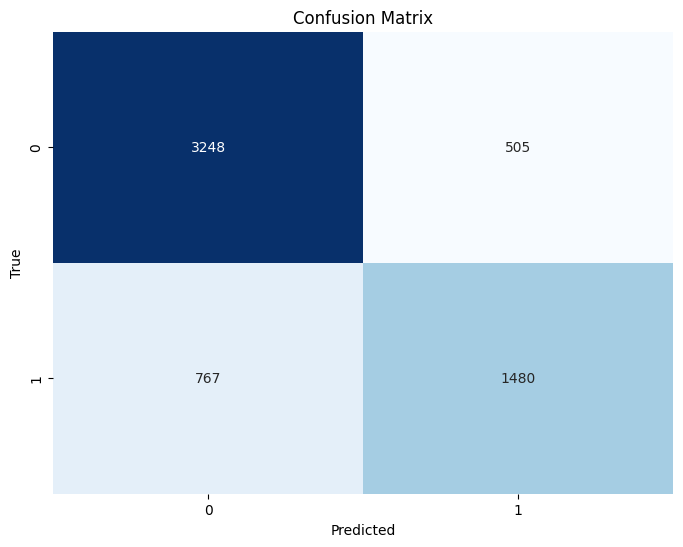

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      3753
           1       0.75      0.66      0.70      2247

    accuracy                           0.79      6000
   macro avg       0.78      0.76      0.77      6000
weighted avg       0.79      0.79      0.79      6000



In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

rf1 = RandomForestClassifier()
rf1.fit(X_train,y_train)
y_pred = rf1.predict(X_test)

acc =metrics.accuracy_score(y_test,y_pred)
print('Test Accuracy :', acc)


cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n",classification_report(y_test, y_pred))

#### XGBoost

Test Accuracy : 0.7816666666666666


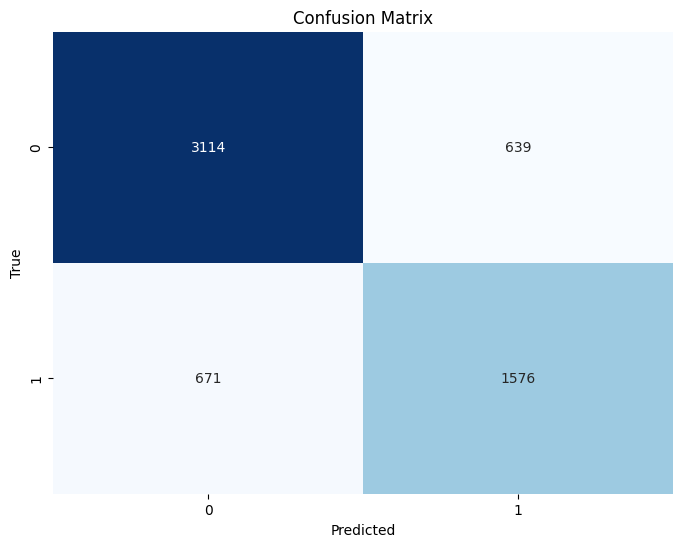

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      3753
           1       0.71      0.70      0.71      2247

    accuracy                           0.78      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.78      0.78      0.78      6000



In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

acc =metrics.accuracy_score(y_test,y_pred)
print('Test Accuracy :', acc)


cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n",classification_report(y_test, y_pred))

So the conclusion is,
From the above results again Random Forest performs well better than XGb
And now the accuracy is also increased by 4%
before it was 75% and after adding features it is 79%

#### Predicting wheather a question is Duplicated or Not?

In [58]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'

In [59]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [60]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [61]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [62]:
def query_point_creator(q1,q2):
    
    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,15),q1_bow,q2_bow))



In [76]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of India?'

In [77]:
X1.shape
rf1.predict(query_point_creator(q1,q2))

array([1], dtype=int64)

1 ------->> Duplicated
0 ------->> Not Duplicated